<a href="https://colab.research.google.com/github/chandrusrini679/Project-1/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
sns.set()

In [ ]:
!pip install -q xlrd

In [ ]:
cust_data= pd.read_excel('/content/cust_data.xlsx')
cust_data

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cust_data.drop('Cust_ID',axis=1,inplace=True)

In [ ]:
cust_data.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
cust_data.isnull().sum()

Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Hollister                    0
Forever 

In [ ]:
cust_data.duplicated().sum()

5171

In [ ]:
cust_data.iloc[:,3:].sample(20)

,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
18073,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15354,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
26995,2,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6033,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
23897,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15771,0,0,0,0,0,0,1,0,0,0,...,0,3,1,0,0,0,0,0,0,0
28340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  27276 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  He

In [ ]:
cust_data.dtypes

Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal                     int64
Tommy Hilf

In [ ]:
x=cust_data.iloc[:,1:]
print(x.columns)

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')


In [ ]:
cust_data['Gender'].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


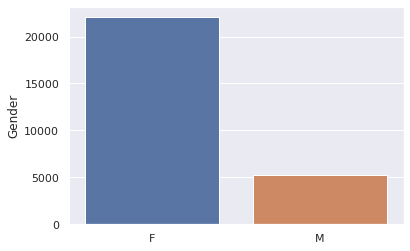

In [ ]:
sns.barplot(cust_data['Gender'].value_counts().index,cust_data['Gender'].value_counts())

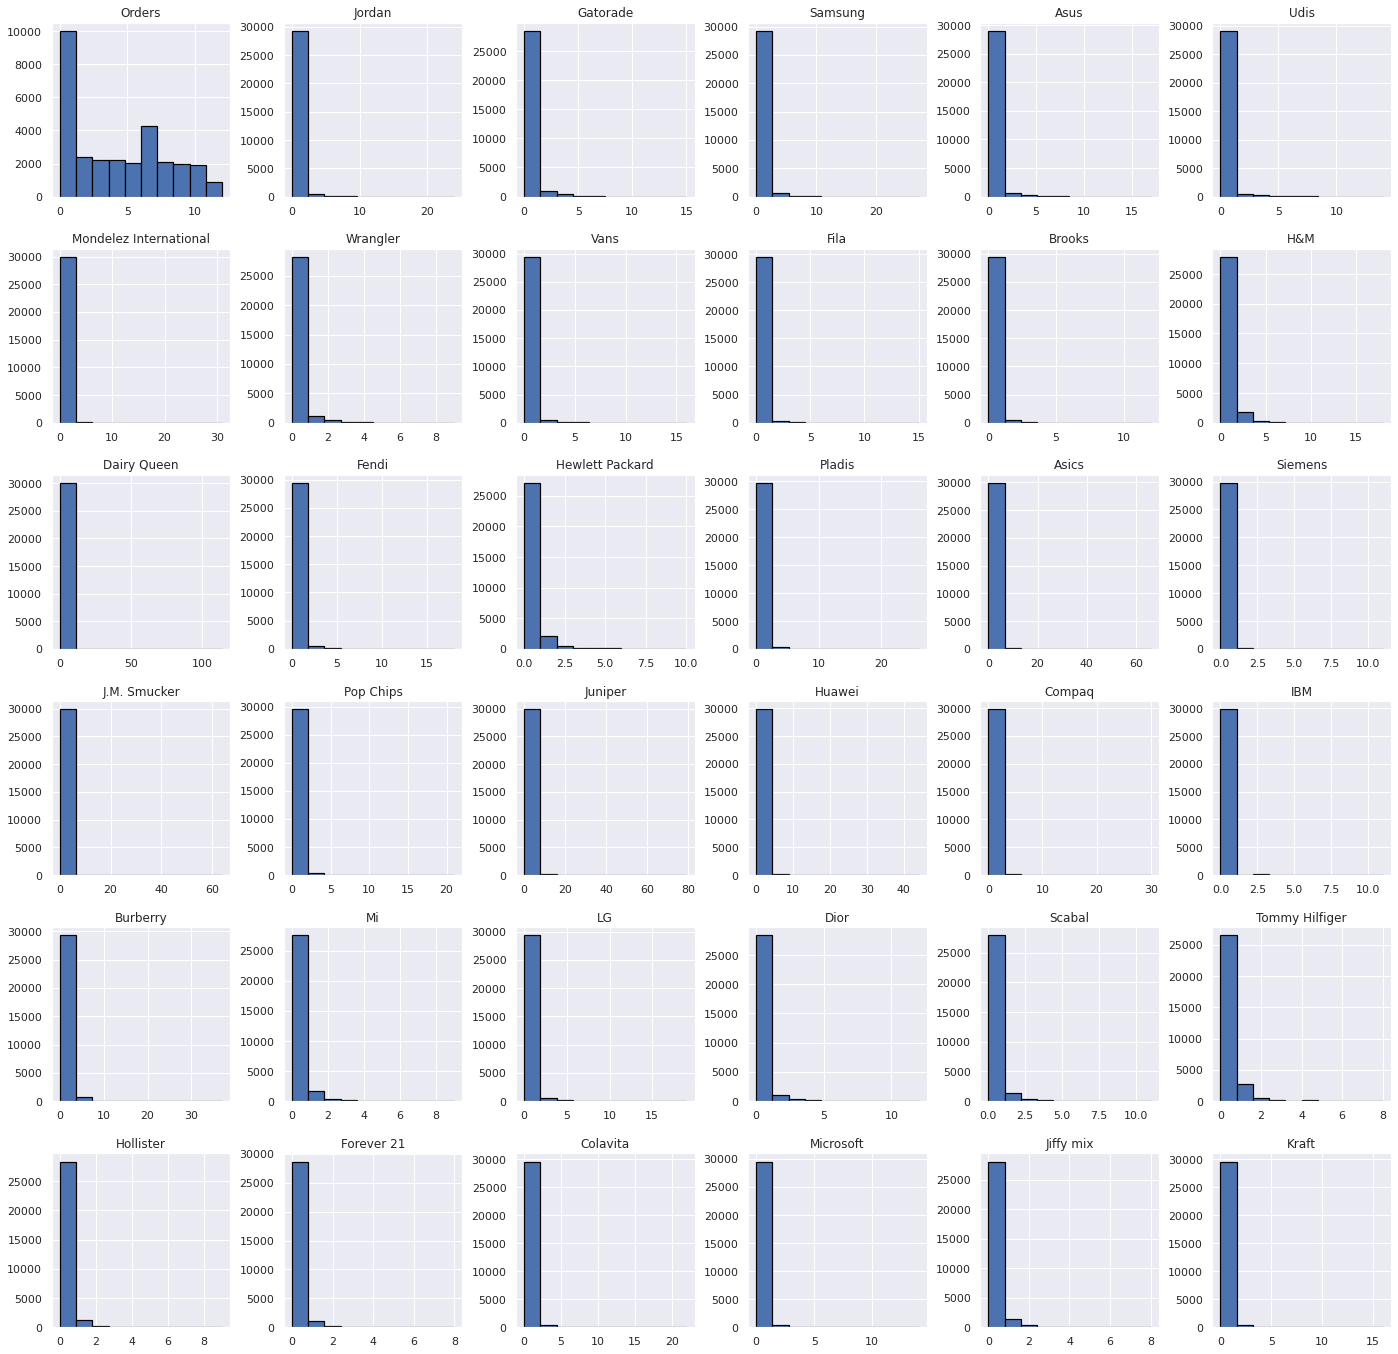

In [ ]:
cust_data.hist(edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(24,24)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [ ]:
cust_data.shape

(30000, 37)

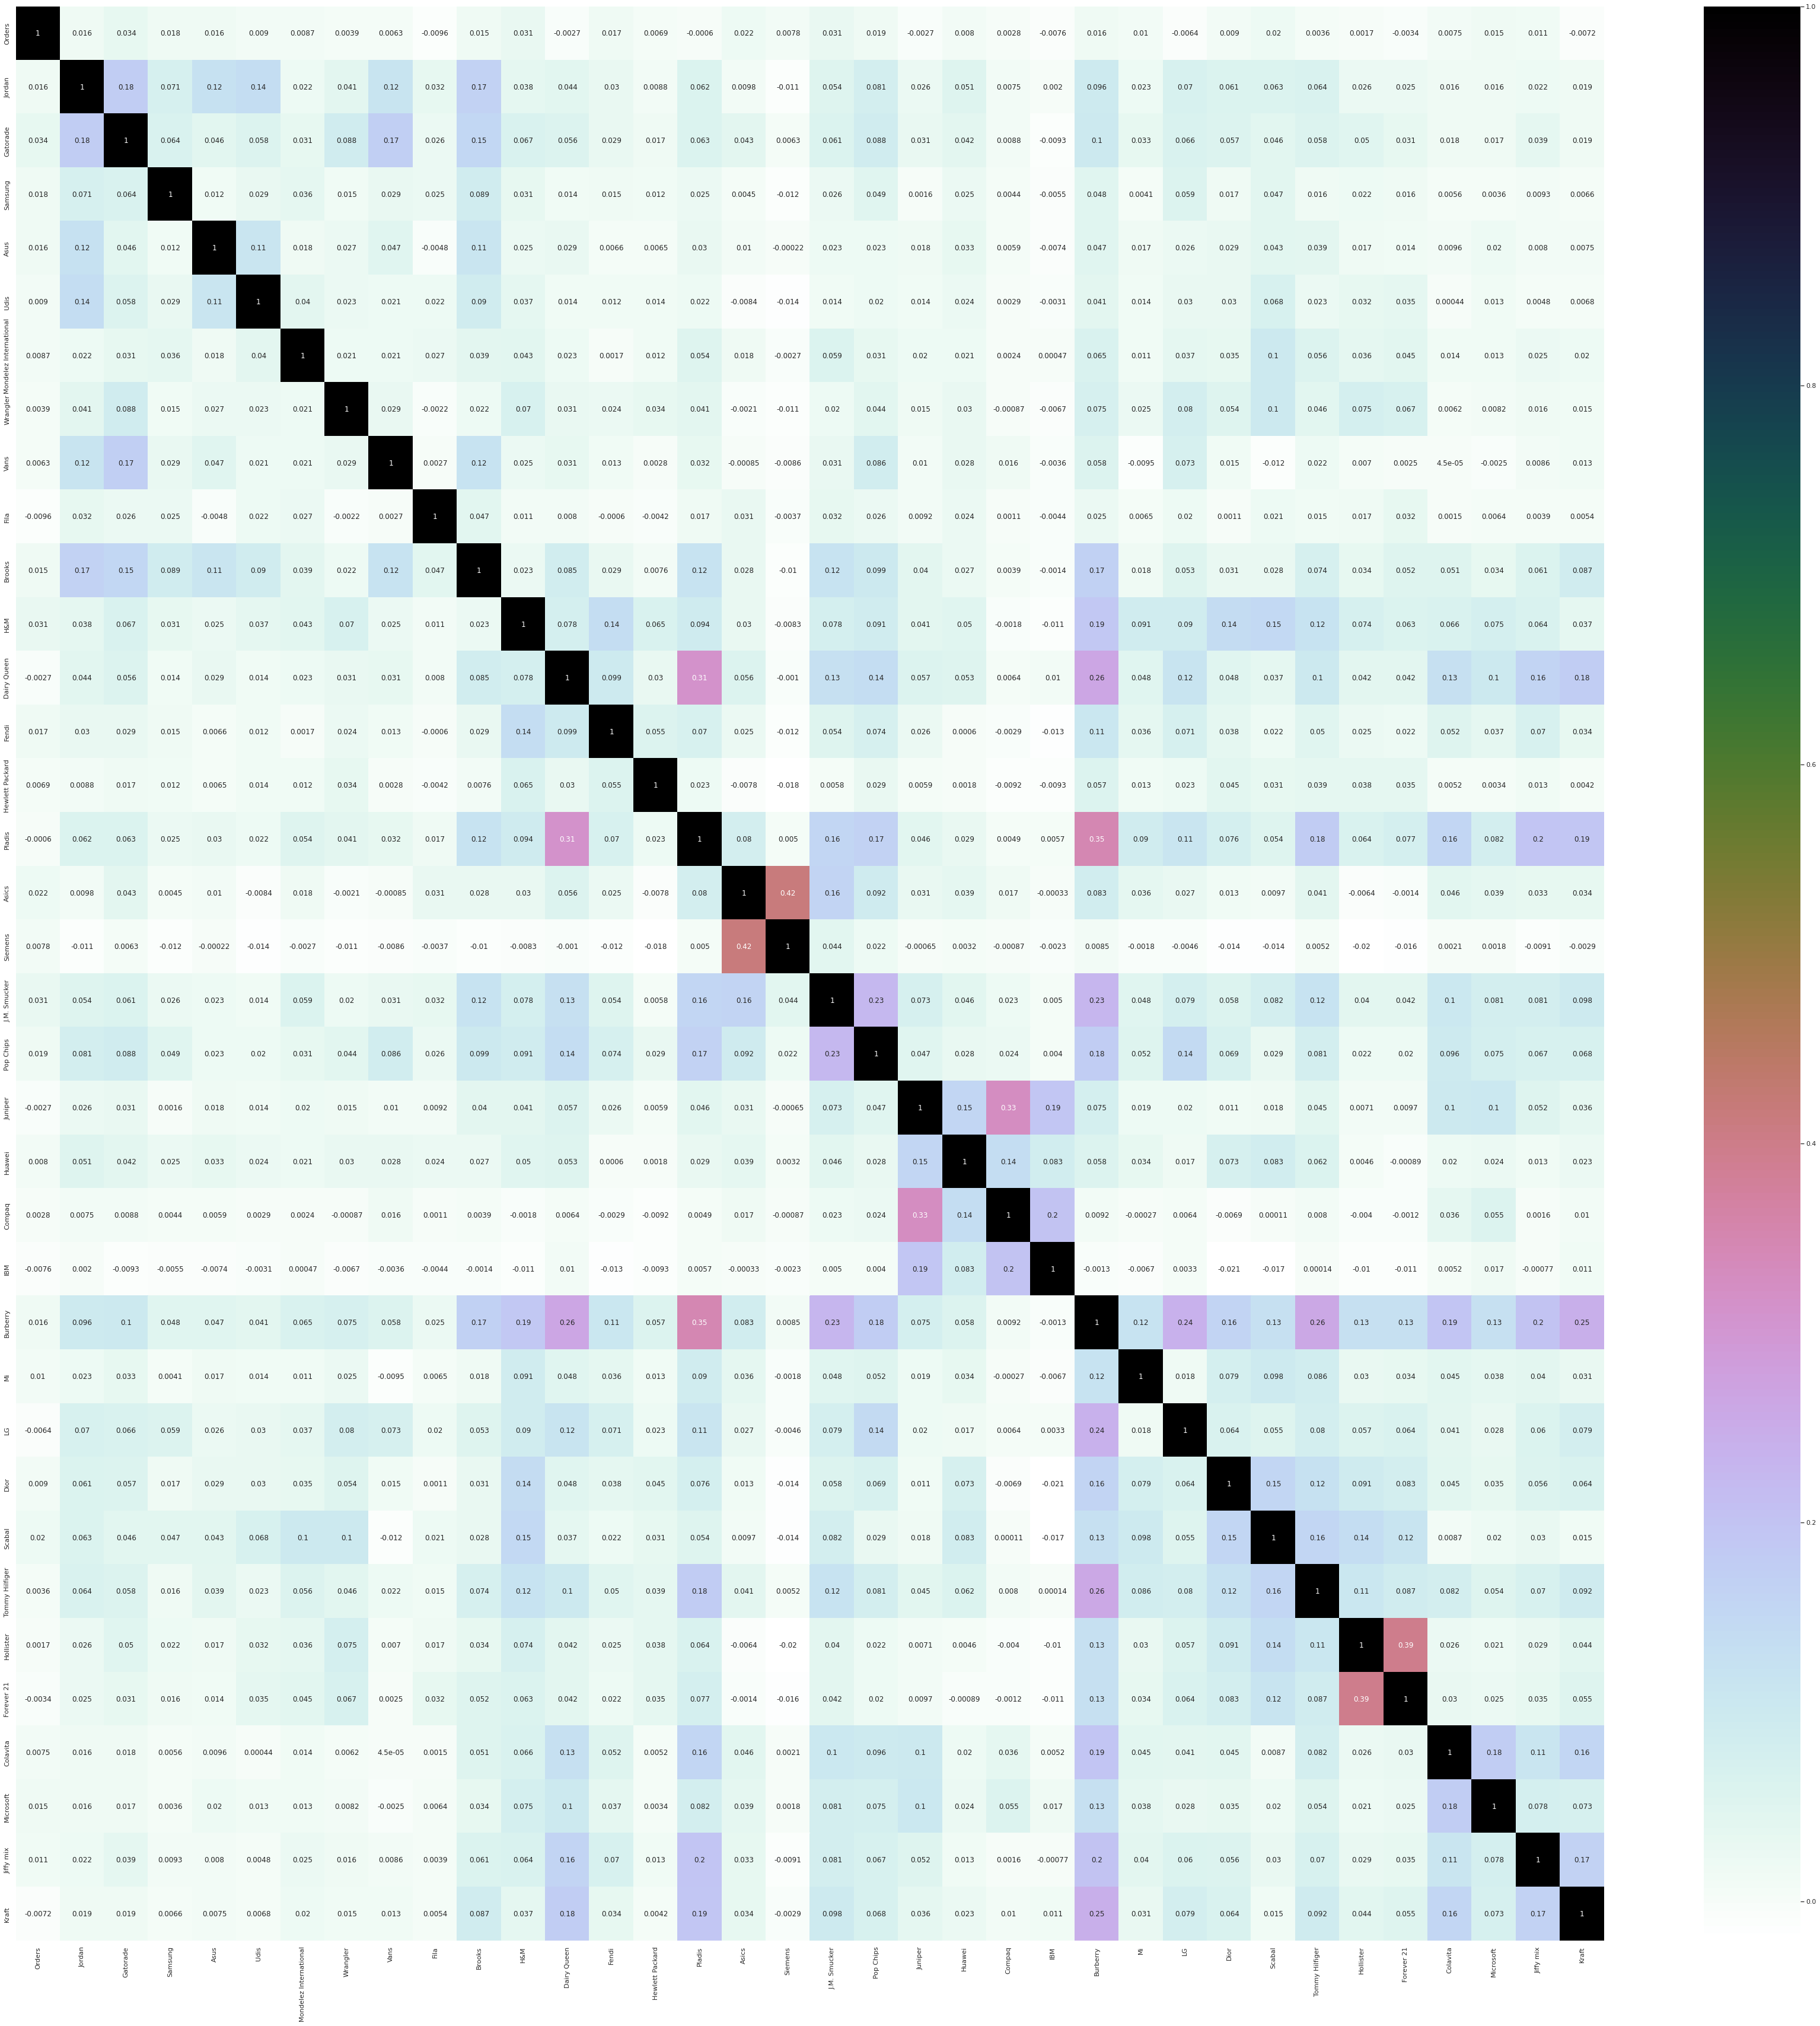

In [ ]:
plt.figure(figsize=(60,60))
sns.heatmap(cust_data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x=cust_data.iloc[:,1:37]
x

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
model=KMeans(3)

In [ ]:
model.fit(x)

KMeans(n_clusters=3)

In [ ]:
model.fit_predict(x)

array([0, 1, 0, ..., 1, 1, 2], dtype=int32)

In [ ]:
identify_cluster=model.fit_predict(x)


In [ ]:
cust_data['cluster']=identify_cluster
cust_data

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,F,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,NaN,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
29996,M,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
29997,M,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
29998,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


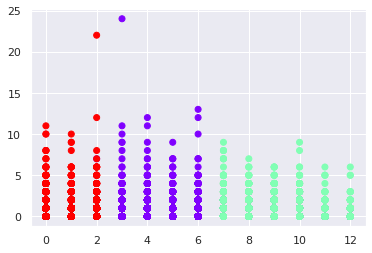

In [ ]:
plt.scatter(cust_data['Orders'],cust_data['Jordan'],c=cust_data['cluster'],cmap='rainbow')
plt.show()

In [ ]:
print("precision: ", metrics.precision_score(targs, preds)) 
print("recall: ", metrics.recall_score(targs, preds))
print("f1: ", metrics.f1_score(targs, preds))
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))